In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import os
base_dir = '/kaggle/input/rockpaperscissors/rps-cv-images'

In [3]:
# image augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)
train_datagen

In [4]:
#Prepare the Data for the Model
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [5]:
#Build CNN Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

2022-09-30 14:09:00.612392: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# count loss function and optimizer
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

In [7]:
# callbacks
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

In [8]:
# train data
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [my_callbacks()]
)

2022-09-30 14:09:01.208265: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
25/25 - 14s - loss: 1.0517 - accuracy: 0.4519 - val_loss: 0.9234 - val_accuracy: 0.5813
Epoch 2/20
25/25 - 14s - loss: 0.6870 - accuracy: 0.7188 - val_loss: 0.4046 - val_accuracy: 0.8687
Epoch 3/20
25/25 - 13s - loss: 0.2674 - accuracy: 0.9130 - val_loss: 0.2455 - val_accuracy: 0.9250
Epoch 4/20
25/25 - 14s - loss: 0.2356 - accuracy: 0.9137 - val_loss: 0.1632 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 13s - loss: 0.2050 - accuracy: 0.9262 - val_loss: 0.1550 - val_accuracy: 0.9625
Epoch 6/20
25/25 - 13s - loss: 0.1805 - accuracy: 0.9481 - val_loss: 0.1605 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 14s - loss: 0.1332 - accuracy: 0.9545 - val_loss: 0.1867 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 14s - loss: 0.1591 - accuracy: 0.9463 - val_loss: 0.1609 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 14s - loss: 0.1218 - accuracy: 0.9588 - val_loss: 0.1939 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 13s - loss: 0.1414 - accuracy: 0.9571 - val_loss: 0.2643 - val_accuracy: 0.9187
Epoch 11/

../input/rockpaperscissors/rps-cv-images/paper/HTETrKtTEB31pvsK.png
paper


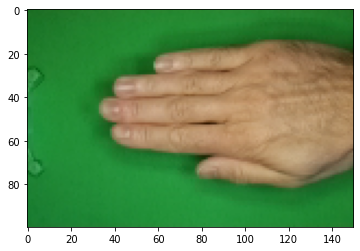

In [9]:
#Predict an Image
path = "../input/rockpaperscissors/rps-cv-images/paper/HTETrKtTEB31pvsK.png"
img_source = image.load_img(path,target_size=(100,150))
imgplot = plt.imshow(img_source)
x = image.img_to_array(img_source)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)

print(path)
if classes[0, 0] == 1:
    print('paper')
elif classes[0, 1] == 1:
    print('rock')
elif classes[0, 2] == 1:
    print('scissor')